## Perform sentiment analysis on Youtube Comments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read GB Comments.csv and ignore bad lines
df = pd.read_csv('./data/youtube/GBComments.csv',error_bad_lines=False)
df

c:\users\ma2\.virtualenvs\machine-learning-ltu8le2q\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0
...,...,...,...,...
718447,lLN1FwiqGwc,MEME ME MEME ME MEME ME,0,0
718448,lLN1FwiqGwc,"Yeah, but does everybody float?",0,0
718449,lLN1FwiqGwc,That meme me dace 😂,0,0
718450,lLN1FwiqGwc,10:43 Is that Miles Upshur????,2,0


In [3]:
# preview first five comments
df.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [4]:
# import module for analysis
from textblob import TextBlob

In [5]:
# Get a sample sentiment analysis of a comment
TextBlob('It\'s more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [6]:
# check the number of NA columns
df.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [7]:
# drop NA columns
df.dropna(inplace=True)

In [8]:
# will hold the polarity values of every comment_text rows
polarity=[]

# loop and get the sentiment polarity
for comment in df['comment_text']:
    polarity.append(TextBlob(comment).sentiment.polarity)

In [9]:
# create new column and assign the polarity values
df['polarity'] = polarity

In [10]:
# get the first 20 records inclusing the new column
df.head(20)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


## Get the Positive Comments

In [11]:
## filter only polarity with 1
positive = df[df['polarity']==1]

In [12]:
positive.shape

(20400, 5)

In [13]:
## get first five record
positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [14]:
# install wordcloud 
#!pipenv install wordcloud

In [15]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
#get word stoppers
wordstopper = set(STOPWORDS)

In [21]:
# get and join all positive comments
all_comments = ' '.join(positive['comment_text'])
all_comments

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The best thing to ever happen to iPhone Apple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4 das a lot of edditing you have done there ... I like it :D Welcome to the Scandiworld! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂 LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!! the sonic air timer was perfect no 16 on trending impressive My daughters name is lacey <3 I'm 17 and can proudly say Moon Dreamers was one of my favourite shows! if I could subscribe to Dude Perfect a million times I would You guys should make dude perfect sceets To be a dude perfect member it is so awesome .... 

In [22]:
#create wordcloud instance
wordcloud = WordCloud(width=1500,height=200, stopwords=wordstopper).generate(all_comments)

(-0.5, 1499.5, 199.5, -0.5)

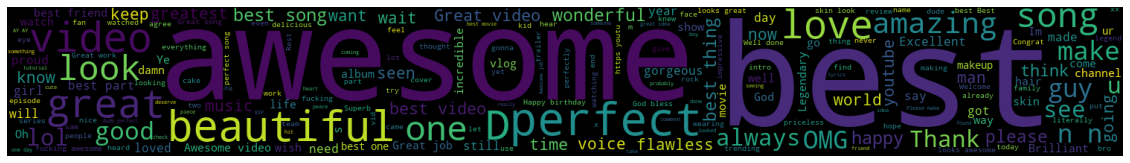

In [23]:
# display sentiments using plt
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off')

## Get the negative Sentiments

In [24]:
negative = df[df['polarity']==-1]

In [25]:
all_negative_comments = ' '.join(negative['comment_text'])

In [26]:
negative_wordcloud = WordCloud(width=1500,height=200, stopwords=wordstopper).generate(all_negative_comments)

(-0.5, 1499.5, 199.5, -0.5)

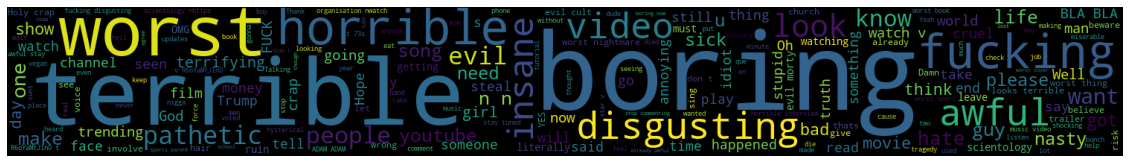

In [27]:
# display sentiments using plt
plt.figure(figsize=(20,15))
plt.imshow(negative_wordcloud)
plt.axis('off')